In [2]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 16.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 76.1 MB/s eta 0:00:00:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for dlib: filename=dlib-19.24.6-cp310-cp310-linux_x86_64.whl size=3374774 sha256=416349038f8c8f791f3c9073d48f839f33f3b8b53d7e9cd56b855c37084e985f
  Stored in directory: /root/.cache/pip/wheels/7c/1d/d1/e69ceb001441acedfa6156acda6c1856699e260ea1a9e6dcc4
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566165 sha256=898b90393fbbb867bea43a212a4e6ec173bab316758fe07ce6609d044e4b64f5
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built dlib face-recognition-models


In [28]:
import numpy as np
import cv2
import face_recognition
import os

In [29]:
main_PATH = '/kaggle/input/facerecognitiondataset2/data'
images = []
labels = []
imgs_path_list = os.listdir(main_PATH)
for cls in imgs_path_list:
  img_PATH = os.path.join(main_PATH,cls)
  img = cv2.imread(img_PATH)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  images.append(img)
  labels.append(os.path.splitext(cls)[0])
print(len(images))
print(labels)


4
['Naymar', 'Ronaldo', 'Messi', 'Zain Ali Shah']


In [30]:
def finding_encodings(image_list):
  encodings_list = []
  for img in images:
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    encodings_list.append(face_recognition.face_encodings(img)[0])
  return encodings_list

In [31]:
total_encodings = finding_encodings(images)
print(len(total_encodings))

4


In [32]:
import matplotlib.pyplot as plt

def face_Recognition(path):
  # Load the captured image (photo.jpg is saved by the JavaScript webcam capture)
  img= cv2.imread(path)


  # Find all face locations in the resized image
  face_locations = face_recognition.face_locations(img)
  face_encodings = face_recognition.face_encodings(img, face_locations)

  # Debugging: Print face locations to see if faces are being detected
  print(f"Face Locations: {face_locations}")

  # If no faces are detected, we know there's an issue with detection
  if len(face_locations) == 0:
      print("No faces detected!")
  else:
      print(f"{len(face_locations)} face(s) detected.")

  # Convert the original image back to BGR for OpenCV drawing
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

  # Loop over each face found in the captured image
  for face_location, face_encoding in zip(face_locations, face_encodings):
      # Compare detected face encodings with known encodings
      match_results = face_recognition.compare_faces(total_encodings, face_encoding)
      distances = face_recognition.face_distance(total_encodings, face_encoding)

      # Debugging: Check the match results and distances
      print(f"Match results: {match_results}")
      print(f"Distances: {distances}")

      # Find the best match (smallest distance)
      match_index = np.argmin(distances)

      if match_results[match_index]:
          name = labels[match_index]
          print(f"Match found: {name}")

          # Get the face location (scaled back to the original image size)
          y1, x2, y2, x1 = face_location

          # Draw a rectangle around the face
          cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

          # Draw a filled rectangle for the label and add the name text
          cv2.rectangle(img, (x1, y1 - 35), (x2, y1), (255, 0, 0), cv2.FILLED)
          cv2.putText(img, name, (x1 + 6, y1 - 6), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
      else:
          print("No match found.")

  # Convert the image back to RGB for matplotlib display
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Display the image with detected faces and annotations
  plt.imshow(img)
  plt.axis('off')  # Hide axis
  plt.show()

Face Locations: [(72, 121, 146, 46)]
1 face(s) detected.
Match results: [False, False, True, False]
Distances: [0.85723799 0.7812946  0.47794519 0.75324294]
Match found: Messi


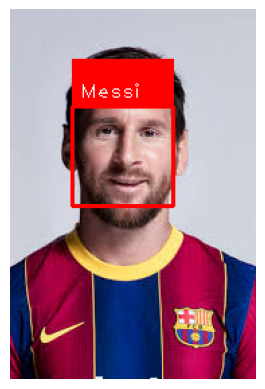

Face Locations: [(41, 108, 84, 64)]
1 face(s) detected.
Match results: [True, False, False, False]
Distances: [0.56206555 0.65970512 0.82404136 0.62281687]
Match found: Naymar


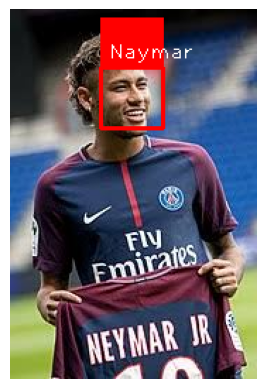

Face Locations: [(49, 175, 101, 124)]
1 face(s) detected.
Match results: [False, False, True, False]
Distances: [0.80512208 0.67504052 0.49468036 0.7911599 ]
Match found: Messi


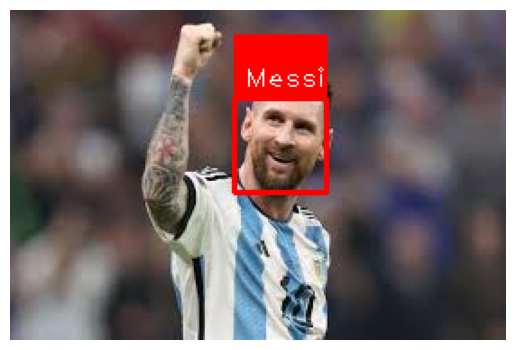

Face Locations: [(34, 193, 70, 157)]
1 face(s) detected.
Match results: [True, False, False, False]
Distances: [0.45501054 0.6326853  0.74528126 0.6113644 ]
Match found: Naymar


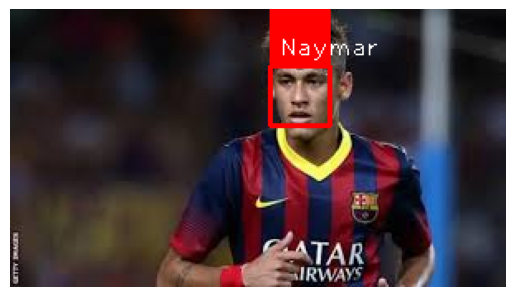

Face Locations: [(22, 161, 58, 125)]
1 face(s) detected.
Match results: [False, False, True, False]
Distances: [0.72534222 0.638786   0.47579586 0.71351556]
Match found: Messi


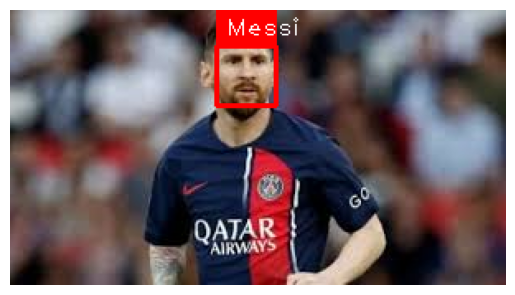

Face Locations: [(587, 438, 855, 171)]
1 face(s) detected.
Match results: [False, False, False, True]
Distances: [0.72939943 0.77154076 0.77012819 0.38330238]
Match found: Zain Ali Shah


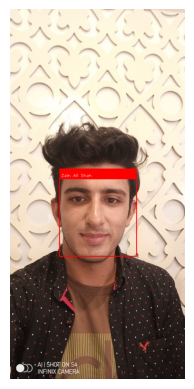

Face Locations: [(32, 118, 84, 66), (38, 291, 90, 239)]
2 face(s) detected.
Match results: [False, False, True, False]
Distances: [0.74612591 0.66084773 0.44494472 0.72164491]
Match found: Messi
Match results: [False, True, False, False]
Distances: [0.6813503  0.52385492 0.70974489 0.61536001]
Match found: Ronaldo


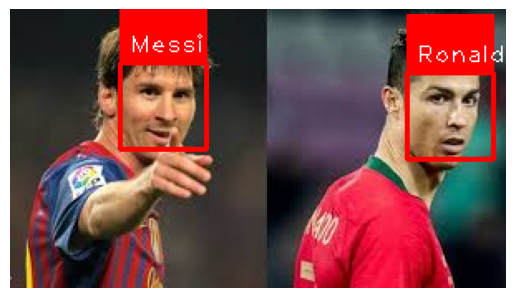

Face Locations: [(105, 121, 179, 46)]
1 face(s) detected.
Match results: [True, False, False, False]
Distances: [0.47134739 0.6471216  0.73138863 0.63117827]
Match found: Naymar


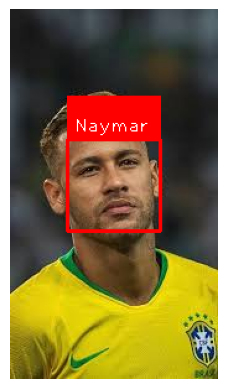

Face Locations: []
No faces detected!


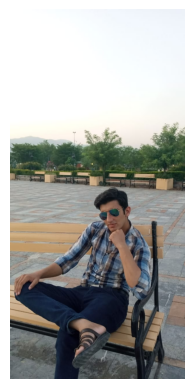

Face Locations: [(92, 163, 199, 55)]
1 face(s) detected.
Match results: [True, False, False, False]
Distances: [0.44679477 0.67371023 0.80236433 0.72735993]
Match found: Naymar


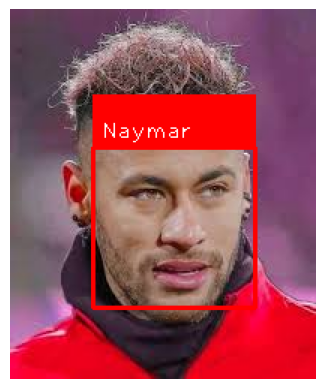

In [34]:
test_path='/kaggle/input/facerecognitiondataset2/test'
test_img_path_list = os.listdir(test_path)
for img_test_path in test_img_path_list:
  test_img_path = os.path.join(test_path,img_test_path)
  face_Recognition(test_img_path)